# 第4章: Linear Regression with One Regressor（単回帰分析）練習問題

この章では単回帰モデル、OLS推定量、決定係数などについて学びます。

In [1]:
# 必要なパッケージの読み込み
# install.packages("AER")  # 初回のみ実行
library(AER)

Loading required package: car



Loading required package: carData



Loading required package: lmtest



Loading required package: zoo




Attaching package: ‘zoo’




The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




Loading required package: sandwich



Loading required package: survival



---
## 問題1: 単回帰モデルの推定（手計算）

以下のデータを使って、単回帰モデル Y = β₀ + β₁X + u を推定してください。

```r
X <- c(1, 2, 3, 4, 5)
Y <- c(2.1, 3.9, 6.2, 7.8, 10.1)
```

1. OLS推定量の公式を使って、β̂₀ と β̂₁ を手計算で求めてください
2. lm()関数を使って結果を確認してください

In [2]:
# 問題1の解答欄
X <- c(1, 2, 3, 4, 5)
Y <- c(2.1, 3.9, 6.2, 7.8, 10.1)



### 模範解答

In [3]:
# 模範解答
X <- c(1, 2, 3, 4, 5)
Y <- c(2.1, 3.9, 6.2, 7.8, 10.1)

# 1. 手計算
n <- length(X)
mean_X <- mean(X)
mean_Y <- mean(Y)

# β̂₁ = Σ(Xi - X̄)(Yi - Ȳ) / Σ(Xi - X̄)²
beta1_hat <- sum((X - mean_X) * (Y - mean_Y)) / sum((X - mean_X)^2)
cat("手計算による β̂₁ =", beta1_hat, "\n")

# β̂₀ = Ȳ - β̂₁ * X̄
beta0_hat <- mean_Y - beta1_hat * mean_X
cat("手計算による β̂₀ =", beta0_hat, "\n\n")

# 2. lm()関数による確認
model <- lm(Y ~ X)
cat("lm()関数による結果:\n")
print(coef(model))

手計算による β̂₁ = 1.99 


手計算による β̂₀ = 0.05 



lm()関数による結果:


(Intercept)           X 
       0.05        1.99 


---
## 問題2: CASchoolsデータを使った回帰分析

AERパッケージのCASchoolsデータを使用します。

1. データを読み込み、構造を確認してください
2. 学生教師比率（STR = students/teachers）と平均テストスコア（score = (read + math)/2）の変数を作成
3. STRを説明変数、scoreを被説明変数とする単回帰モデルを推定
4. 結果を解釈してください

In [4]:
# 問題2の解答欄



### 模範解答

In [5]:
# 模範解答
# 1. データの読み込みと構造確認
data("CASchools")
cat("データの構造:\n")
str(CASchools)

# 2. 変数の作成
CASchools$STR <- CASchools$students / CASchools$teachers
CASchools$score <- (CASchools$read + CASchools$math) / 2

# 3. 単回帰モデルの推定
model <- lm(score ~ STR, data = CASchools)
cat("\n回帰分析の結果:\n")
summary(model)

# 4. 解釈
cat("\n=== 結果の解釈 ===", "\n")
cat("傾き係数 β̂₁ =", coef(model)[2], "\n")
cat("→ 学生教師比率が1増加すると、テストスコアは約", 
    round(coef(model)[2], 2), "点減少する\n")

データの構造:


'data.frame':	420 obs. of  14 variables:
 $ district   : chr  "75119" "61499" "61549" "61457" ...
 $ school     : chr  "Sunol Glen Unified" "Manzanita Elementary" "Thermalito Union Elementary" "Golden Feather Union Elementary" ...
 $ county     : Factor w/ 45 levels "Alameda","Butte",..: 1 2 2 2 2 6 29 11 6 25 ...
 $ grades     : Factor w/ 2 levels "KK-06","KK-08": 2 2 2 2 2 2 2 2 2 1 ...
 $ students   : num  195 240 1550 243 1335 ...
 $ teachers   : num  10.9 11.1 82.9 14 71.5 ...
 $ calworks   : num  0.51 15.42 55.03 36.48 33.11 ...
 $ lunch      : num  2.04 47.92 76.32 77.05 78.43 ...
 $ computer   : num  67 101 169 85 171 25 28 66 35 0 ...
 $ expenditure: num  6385 5099 5502 7102 5236 ...
 $ income     : num  22.69 9.82 8.98 8.98 9.08 ...
 $ english    : num  0 4.58 30 0 13.86 ...
 $ read       : num  692 660 636 652 642 ...
 $ math       : num  690 662 651 644 640 ...



回帰分析の結果:



Call:
lm(formula = score ~ STR, data = CASchools)

Residuals:
    Min      1Q  Median      3Q     Max 
-47.727 -14.251   0.483  12.822  48.540 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 698.9329     9.4675  73.825  < 2e-16 ***
STR          -2.2798     0.4798  -4.751 2.78e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.58 on 418 degrees of freedom
Multiple R-squared:  0.05124,	Adjusted R-squared:  0.04897 
F-statistic: 22.58 on 1 and 418 DF,  p-value: 2.783e-06



=== 結果の解釈 === 


傾き係数 β̂₁ = -2.279808 


→ 学生教師比率が1増加すると、テストスコアは約 -2.28 点減少する


---
## 問題3: 散布図と回帰直線

問題2のデータを使って、

1. STRとscoreの散布図を作成してください
2. 回帰直線を追加してください
3. グラフにタイトルと軸ラベルを付けてください

In [6]:
# 問題3の解答欄



### 模範解答

Warning message in title(...):
“conversion failure on '学生教師比率とテストスコアの関係' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '学生教師比率とテストスコアの関係' in 'mbcsToSbcs': dot substituted for <ad>”


Warning message in title(...):
“conversion failure on '学生教師比率とテストスコアの関係' in 'mbcsToSbcs': dot substituted for <a6>”


Warning message in title(...):
“conversion failure on '学生教師比率とテストスコアの関係' in 'mbcsToSbcs': dot substituted for <e7>”


Warning message in title(...):
“conversion failure on '学生教師比率とテストスコアの関係' in 'mbcsToSbcs': dot substituted for <94>”


Warning message in title(...):
“conversion failure on '学生教師比率とテストスコアの関係' in 'mbcsToSbcs': dot substituted for <9f>”


Warning message in title(...):
“conversion failure on '学生教師比率とテストスコアの関係' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '学生教師比率とテストスコアの関係' in 'mbcsToSbcs': dot substituted for <95>”


Warning message in title(...):
“conversion failure on '学生教師比率とテストスコアの関係' in 'mbcsToSbcs': dot substituted for <99>”


Warning message in title(...):
“conversion failure on '学生教師比率とテストスコアの関係' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '学生教師比率とテストスコアの関係' in 'mbcsToSbcs': dot substituted for <b8>”


Warning message in title(...):
“conversion failure on '学生教師比率とテストスコアの関係' in 'mbcsToSbcs': dot substituted for <ab>”


Warning message in title(...):
“conversion failure on '学生教師比率とテストスコアの関係' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '学生教師比率とテストスコアの関係' in 'mbcsToSbcs': dot substituted for <af>”


Warning message in title(...):
“conversion failure on '学生教師比率とテストスコアの関係' in 'mbcsToSbcs': dot substituted for <94>”


Warning message in title(...):
“conversion failure on '学生教師比率とテストスコアの関係' in 'mbcsToSbcs': dot substituted for <e7>”


Warning message in title(...):
“conversion failure on '学生教師比率とテストスコアの関係' in 'mbcsToSbcs': dot substituted for <8e>”


Warning message in title(...):
“conversion failure on '学生教師比率とテストスコアの関係' in 'mbcsToSbcs': dot substituted for <87>”


Warning message in title(...):
“conversion failure on '学生教師比率とテストスコアの関係' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '学生教師比率とテストスコアの関係' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(...):
“conversion failure on '学生教師比率とテストスコアの関係' in 'mbcsToSbcs': dot substituted for <a8>”


Warning message in title(...):
“conversion failure on '学生教師比率とテストスコアの関係' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '学生教師比率とテストスコアの関係' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on '学生教師比率とテストスコアの関係' in 'mbcsToSbcs': dot substituted for <86>”


Warning message in title(...):
“conversion failure on '学生教師比率とテストスコアの関係' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '学生教師比率とテストスコアの関係' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on '学生教師比率とテストスコアの関係' in 'mbcsToSbcs': dot substituted for <b9>”


Warning message in title(...):
“conversion failure on '学生教師比率とテストスコアの関係' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '学生教師比率とテストスコアの関係' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on '学生教師比率とテストスコアの関係' in 'mbcsToSbcs': dot substituted for <88>”


Warning message in title(...):
“conversion failure on '学生教師比率とテストスコアの関係' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '学生教師比率とテストスコアの関係' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on '学生教師比率とテストスコアの関係' in 'mbcsToSbcs': dot substituted for <b9>”


Warning message in title(...):
“conversion failure on '学生教師比率とテストスコアの関係' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '学生教師比率とテストスコアの関係' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on '学生教師比率とテストスコアの関係' in 'mbcsToSbcs': dot substituted for <b3>”


Warning message in title(...):
“conversion failure on '学生教師比率とテストスコアの関係' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '学生教師比率とテストスコアの関係' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on '学生教師比率とテストスコアの関係' in 'mbcsToSbcs': dot substituted for <a2>”


Warning message in title(...):
“conversion failure on '学生教師比率とテストスコアの関係' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '学生教師比率とテストスコアの関係' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(...):
“conversion failure on '学生教師比率とテストスコアの関係' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(...):
“conversion failure on '学生教師比率とテストスコアの関係' in 'mbcsToSbcs': dot substituted for <e9>”


Warning message in title(...):
“conversion failure on '学生教師比率とテストスコアの関係' in 'mbcsToSbcs': dot substituted for <96>”


Warning message in title(...):
“conversion failure on '学生教師比率とテストスコアの関係' in 'mbcsToSbcs': dot substituted for <a2>”


Warning message in title(...):
“conversion failure on '学生教師比率とテストスコアの関係' in 'mbcsToSbcs': dot substituted for <e4>”


Warning message in title(...):
“conversion failure on '学生教師比率とテストスコアの関係' in 'mbcsToSbcs': dot substituted for <bf>”


Warning message in title(...):
“conversion failure on '学生教師比率とテストスコアの関係' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on '学生教師比率 (STR)' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '学生教師比率 (STR)' in 'mbcsToSbcs': dot substituted for <ad>”


Warning message in title(...):
“conversion failure on '学生教師比率 (STR)' in 'mbcsToSbcs': dot substituted for <a6>”


Warning message in title(...):
“conversion failure on '学生教師比率 (STR)' in 'mbcsToSbcs': dot substituted for <e7>”


Warning message in title(...):
“conversion failure on '学生教師比率 (STR)' in 'mbcsToSbcs': dot substituted for <94>”


Warning message in title(...):
“conversion failure on '学生教師比率 (STR)' in 'mbcsToSbcs': dot substituted for <9f>”


Warning message in title(...):
“conversion failure on '学生教師比率 (STR)' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '学生教師比率 (STR)' in 'mbcsToSbcs': dot substituted for <95>”


Warning message in title(...):
“conversion failure on '学生教師比率 (STR)' in 'mbcsToSbcs': dot substituted for <99>”


Warning message in title(...):
“conversion failure on '学生教師比率 (STR)' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '学生教師比率 (STR)' in 'mbcsToSbcs': dot substituted for <b8>”


Warning message in title(...):
“conversion failure on '学生教師比率 (STR)' in 'mbcsToSbcs': dot substituted for <ab>”


Warning message in title(...):
“conversion failure on '学生教師比率 (STR)' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '学生教師比率 (STR)' in 'mbcsToSbcs': dot substituted for <af>”


Warning message in title(...):
“conversion failure on '学生教師比率 (STR)' in 'mbcsToSbcs': dot substituted for <94>”


Warning message in title(...):
“conversion failure on '学生教師比率 (STR)' in 'mbcsToSbcs': dot substituted for <e7>”


Warning message in title(...):
“conversion failure on '学生教師比率 (STR)' in 'mbcsToSbcs': dot substituted for <8e>”


Warning message in title(...):
“conversion failure on '学生教師比率 (STR)' in 'mbcsToSbcs': dot substituted for <87>”


Warning message in title(...):
“conversion failure on 'テストスコア' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'テストスコア' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'テストスコア' in 'mbcsToSbcs': dot substituted for <86>”


Warning message in title(...):
“conversion failure on 'テストスコア' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'テストスコア' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'テストスコア' in 'mbcsToSbcs': dot substituted for <b9>”


Warning message in title(...):
“conversion failure on 'テストスコア' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'テストスコア' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'テストスコア' in 'mbcsToSbcs': dot substituted for <88>”


Warning message in title(...):
“conversion failure on 'テストスコア' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'テストスコア' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'テストスコア' in 'mbcsToSbcs': dot substituted for <b9>”


Warning message in title(...):
“conversion failure on 'テストスコア' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'テストスコア' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'テストスコア' in 'mbcsToSbcs': dot substituted for <b3>”


Warning message in title(...):
“conversion failure on 'テストスコア' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'テストスコア' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'テストスコア' in 'mbcsToSbcs': dot substituted for <a2>”


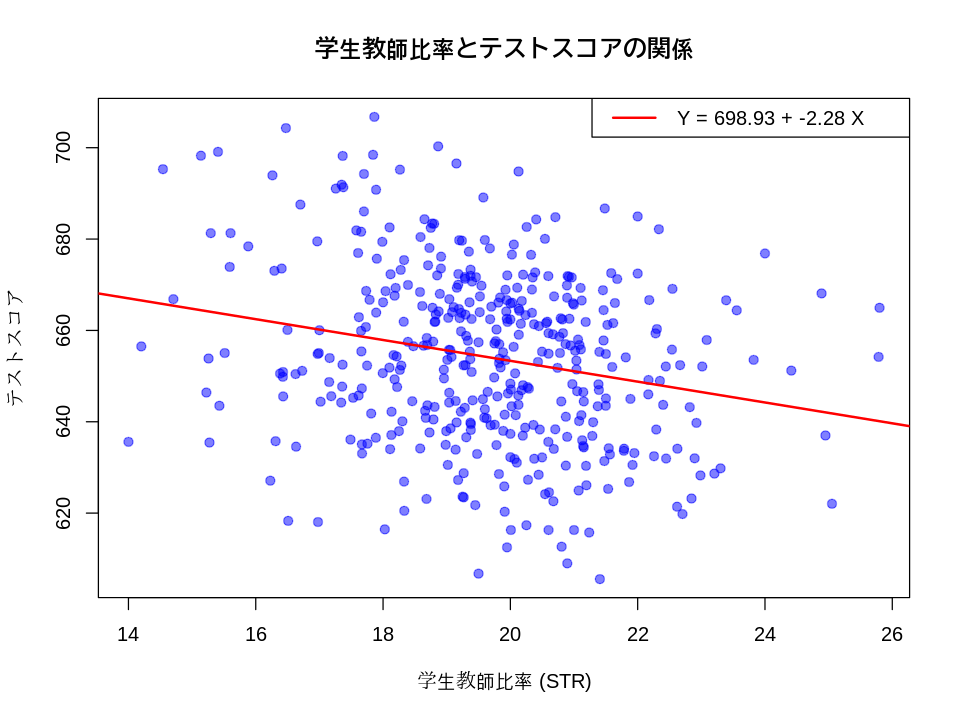

In [7]:
# 模範解答
# 散布図の作成
plot(CASchools$STR, CASchools$score,
     main = "学生教師比率とテストスコアの関係",
     xlab = "学生教師比率 (STR)",
     ylab = "テストスコア",
     pch = 19,
     col = rgb(0, 0, 1, 0.5))  # 半透明の青

# 回帰直線の追加
abline(model, col = "red", lwd = 2)

# 凡例の追加
legend("topright", 
       legend = paste("Y =", round(coef(model)[1], 2), 
                      "+", round(coef(model)[2], 2), "X"),
       col = "red", lwd = 2)

---
## 問題4: 決定係数（R²）の計算

問題2のモデルについて、

1. 残差を計算し、残差の平方和（SSR）を求めてください
2. 全平方和（TSS）を求めてください
3. 決定係数 R² = 1 - SSR/TSS を計算してください
4. summary()の出力と比較してください

In [8]:
# 問題4の解答欄



### 模範解答

In [9]:
# 模範解答
# 1. 残差と残差平方和
residuals <- resid(model)
SSR <- sum(residuals^2)
cat("残差平方和 (SSR) =", SSR, "\n")

# 2. 全平方和
y_mean <- mean(CASchools$score)
TSS <- sum((CASchools$score - y_mean)^2)
cat("全平方和 (TSS) =", TSS, "\n")

# 3. 決定係数
R_squared <- 1 - SSR / TSS
cat("決定係数 R² =", R_squared, "\n\n")

# 4. summary()との比較
cat("summary()から取得したR² =", summary(model)$r.squared, "\n")

残差平方和 (SSR) = 144315.5 


全平方和 (TSS) = 152109.6 


決定係数 R² = 0.05124009 



summary()から取得したR² = 0.05124009 


---
## 問題5: 回帰の標準誤差（SER）

問題2のモデルについて、

1. 回帰の標準誤差（Standard Error of Regression）を計算してください
   - SER = √(SSR / (n - 2))
2. この値の意味を説明してください
3. summary()の出力と比較してください

In [10]:
# 問題5の解答欄



### 模範解答

In [11]:
# 模範解答
# 1. SERの計算
n <- nrow(CASchools)
SSR <- sum(resid(model)^2)
SER <- sqrt(SSR / (n - 2))
cat("回帰の標準誤差 (SER) =", SER, "\n\n")

# 2. 意味の説明
cat("=== SERの意味 ===", "\n")
cat("SERは回帰モデルの当てはまりの尺度で、\n")
cat("被説明変数Yの予測値と実際の値との平均的な乖離を示す。\n")
cat("SER =", round(SER, 2), "は、予測誤差が平均的に約", round(SER, 2), "点であることを意味する。\n\n")

# 3. summary()との比較
cat("summary()から取得したSER (Residual standard error) =", 
    summary(model)$sigma, "\n")

回帰の標準誤差 (SER) = 18.58097 



=== SERの意味 === 


SERは回帰モデルの当てはまりの尺度で、


被説明変数Yの予測値と実際の値との平均的な乖離を示す。


SER = 18.58 は、予測誤差が平均的に約 18.58 点であることを意味する。



summary()から取得したSER (Residual standard error) = 18.58097 


---
## 問題6: 予測値の計算

問題2のモデルを使って、

1. STR = 20 のときのテストスコアの予測値を計算してください
2. STR = 15, 20, 25 のそれぞれについて予測値を計算し、表にまとめてください
3. predict()関数を使って確認してください

In [12]:
# 問題6の解答欄



### 模範解答

In [13]:
# 模範解答
# 係数を取得
beta0 <- coef(model)[1]
beta1 <- coef(model)[2]

# 1. STR = 20 の予測値
pred_20 <- beta0 + beta1 * 20
cat("STR = 20 のときの予測スコア:", pred_20, "\n\n")

# 2. 複数のSTRについて予測
STR_values <- c(15, 20, 25)
predictions_manual <- beta0 + beta1 * STR_values

result_table <- data.frame(
  STR = STR_values,
  予測スコア = predictions_manual
)
print(result_table)

# 3. predict()関数による確認
cat("\npredict()関数による確認:\n")
new_data <- data.frame(STR = c(15, 20, 25))
predictions <- predict(model, newdata = new_data)
print(predictions)

STR = 20 のときの予測スコア: 653.3368 



  STR 予測スコア
1  15   664.7358
2  20   653.3368
3  25   641.9377



predict()関数による確認:


       1        2        3 
664.7358 653.3368 641.9377 


---
## 問題7: OLS推定量の性質（シミュレーション）

OLS推定量が不偏性を持つことをシミュレーションで確認します。

真のモデル: Y = 2 + 3X + u, u ~ N(0, 1)

1. X を一様分布 U(0, 10) から100個生成
2. 上記のモデルに従ってYを生成
3. OLSで β₀ と β₁ を推定
4. これを1000回繰り返し、推定値の分布を確認

In [14]:
# 問題7の解答欄



### 模範解答

=== シミュレーション結果 === 


β̂₀ の平均: 2.006528 (真の値: 2)


β̂₁ の平均: 2.999379 (真の値: 3)



Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“font metrics unknown for Unicode character U+306e”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“font metrics unknown for Unicode character U+5206”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“font metrics unknown for Unicode character U+5e03”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <88>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <86>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <b8>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“font metrics unknown for Unicode character U+306e”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“font metrics unknown for Unicode character U+5206”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“font metrics unknown for Unicode character U+5e03”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <88>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <86>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <b8>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <88>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <86>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <b8>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“font metrics unknown for Unicode character U+306e”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“font metrics unknown for Unicode character U+5206”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“font metrics unknown for Unicode character U+5e03”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <88>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <86>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <b8>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“font metrics unknown for Unicode character U+306e”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“font metrics unknown for Unicode character U+5206”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“font metrics unknown for Unicode character U+5e03”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <88>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <86>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <b8>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <88>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <86>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <b8>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'の分布' in 'mbcsToSbcs': dot substituted for <83>”


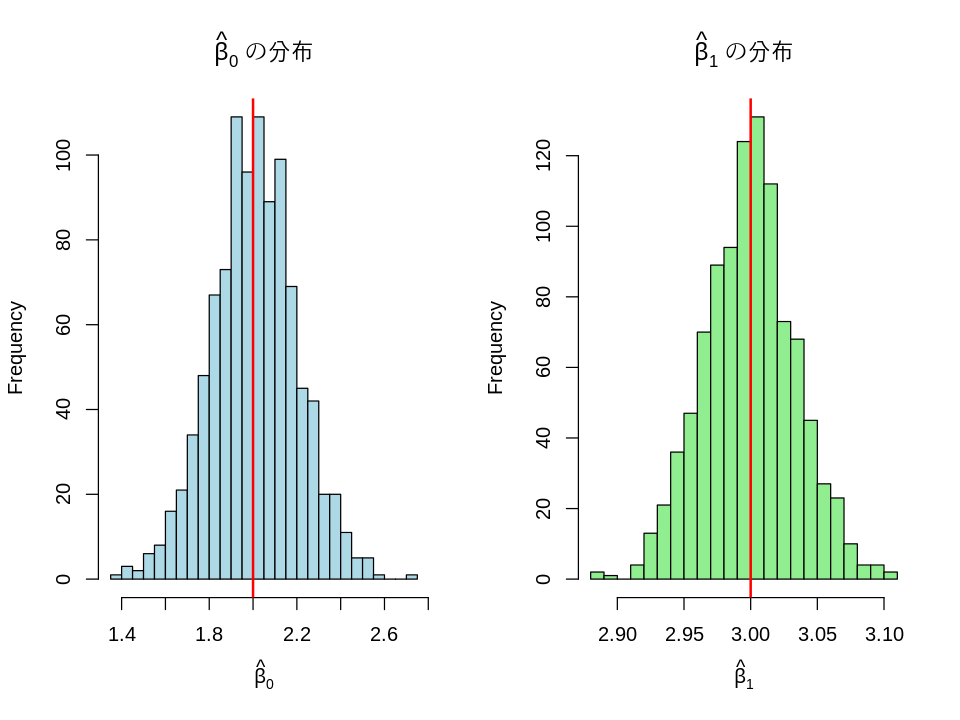

In [15]:
# 模範解答
set.seed(123)
n <- 100           # サンプルサイズ
n_sim <- 1000      # シミュレーション回数
beta0_true <- 2    # 真のβ₀
beta1_true <- 3    # 真のβ₁
sigma <- 1         # 誤差の標準偏差

# 推定値を格納するベクトル
beta0_estimates <- numeric(n_sim)
beta1_estimates <- numeric(n_sim)

for (i in 1:n_sim) {
  X <- runif(n, 0, 10)
  u <- rnorm(n, 0, sigma)
  Y <- beta0_true + beta1_true * X + u
  
  model_sim <- lm(Y ~ X)
  beta0_estimates[i] <- coef(model_sim)[1]
  beta1_estimates[i] <- coef(model_sim)[2]
}

# 結果の表示
cat("=== シミュレーション結果 ===", "\n")
cat("β̂₀ の平均:", mean(beta0_estimates), "(真の値: 2)\n")
cat("β̂₁ の平均:", mean(beta1_estimates), "(真の値: 3)\n\n")

# ヒストグラムの描画
par(mfrow = c(1, 2))
hist(beta0_estimates, breaks = 30, main = expression(hat(beta)[0] ~ "の分布"),
     xlab = expression(hat(beta)[0]), col = "lightblue")
abline(v = beta0_true, col = "red", lwd = 2)

hist(beta1_estimates, breaks = 30, main = expression(hat(beta)[1] ~ "の分布"),
     xlab = expression(hat(beta)[1]), col = "lightgreen")
abline(v = beta1_true, col = "red", lwd = 2)
par(mfrow = c(1, 1))

---
## 問題8: 残差分析

問題2のモデルについて、

1. 残差のヒストグラムを描画してください
2. 残差 vs. 予測値のプロットを作成してください
3. 残差の正規Q-Qプロットを作成してください
4. これらの図から何が分かるか説明してください

In [16]:
# 問題8の解答欄



### 模範解答

Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '残差のヒストグラム' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '残差のヒストグラム' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '残差のヒストグラム' in 'mbcsToSbcs': dot substituted for <8b>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '残差のヒストグラム' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '残差のヒストグラム' in 'mbcsToSbcs': dot substituted for <b7>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '残差のヒストグラム' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '残差のヒストグラム' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '残差のヒストグラム' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '残差のヒストグラム' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '残差のヒストグラム' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '残差のヒストグラム' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '残差のヒストグラム' in 'mbcsToSbcs': dot substituted for <92>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '残差のヒストグラム' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '残差のヒストグラム' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '残差のヒストグラム' in 'mbcsToSbcs': dot substituted for <b9>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '残差のヒストグラム' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '残差のヒストグラム' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '残差のヒストグラム' in 'mbcsToSbcs': dot substituted for <88>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '残差のヒストグラム' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '残差のヒストグラム' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '残差のヒストグラム' in 'mbcsToSbcs': dot substituted for <b0>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '残差のヒストグラム' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '残差のヒストグラム' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '残差のヒストグラム' in 'mbcsToSbcs': dot substituted for <a9>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '残差のヒストグラム' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '残差のヒストグラム' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '残差のヒストグラム' in 'mbcsToSbcs': dot substituted for <a0>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '残差' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '残差' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '残差' in 'mbcsToSbcs': dot substituted for <8b>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '残差' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '残差' in 'mbcsToSbcs': dot substituted for <b7>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '残差' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(...):
“conversion failure on '残差 vs. 予測値' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '残差 vs. 予測値' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(...):
“conversion failure on '残差 vs. 予測値' in 'mbcsToSbcs': dot substituted for <8b>”


Warning message in title(...):
“conversion failure on '残差 vs. 予測値' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '残差 vs. 予測値' in 'mbcsToSbcs': dot substituted for <b7>”


Warning message in title(...):
“conversion failure on '残差 vs. 予測値' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(...):
“conversion failure on '残差 vs. 予測値' in 'mbcsToSbcs': dot substituted for <e4>”


Warning message in title(...):
“conversion failure on '残差 vs. 予測値' in 'mbcsToSbcs': dot substituted for <ba>”


Warning message in title(...):
“conversion failure on '残差 vs. 予測値' in 'mbcsToSbcs': dot substituted for <88>”


Warning message in title(...):
“conversion failure on '残差 vs. 予測値' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '残差 vs. 予測値' in 'mbcsToSbcs': dot substituted for <b8>”


Warning message in title(...):
“conversion failure on '残差 vs. 予測値' in 'mbcsToSbcs': dot substituted for <ac>”


Warning message in title(...):
“conversion failure on '残差 vs. 予測値' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '残差 vs. 予測値' in 'mbcsToSbcs': dot substituted for <80>”


Warning message in title(...):
“conversion failure on '残差 vs. 予測値' in 'mbcsToSbcs': dot substituted for <a4>”


Warning message in title(...):
“conversion failure on '予測値' in 'mbcsToSbcs': dot substituted for <e4>”


Warning message in title(...):
“conversion failure on '予測値' in 'mbcsToSbcs': dot substituted for <ba>”


Warning message in title(...):
“conversion failure on '予測値' in 'mbcsToSbcs': dot substituted for <88>”


Warning message in title(...):
“conversion failure on '予測値' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '予測値' in 'mbcsToSbcs': dot substituted for <b8>”


Warning message in title(...):
“conversion failure on '予測値' in 'mbcsToSbcs': dot substituted for <ac>”


Warning message in title(...):
“conversion failure on '予測値' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '予測値' in 'mbcsToSbcs': dot substituted for <80>”


Warning message in title(...):
“conversion failure on '予測値' in 'mbcsToSbcs': dot substituted for <a4>”


Warning message in title(...):
“conversion failure on '残差' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '残差' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(...):
“conversion failure on '残差' in 'mbcsToSbcs': dot substituted for <8b>”


Warning message in title(...):
“conversion failure on '残差' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '残差' in 'mbcsToSbcs': dot substituted for <b7>”


Warning message in title(...):
“conversion failure on '残差' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(...):
“conversion failure on '正規Q-Qプロット' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '正規Q-Qプロット' in 'mbcsToSbcs': dot substituted for <ad>”


Warning message in title(...):
“conversion failure on '正規Q-Qプロット' in 'mbcsToSbcs': dot substituted for <a3>”


Warning message in title(...):
“conversion failure on '正規Q-Qプロット' in 'mbcsToSbcs': dot substituted for <e8>”


Warning message in title(...):
“conversion failure on '正規Q-Qプロット' in 'mbcsToSbcs': dot substituted for <a6>”


Warning message in title(...):
“conversion failure on '正規Q-Qプロット' in 'mbcsToSbcs': dot substituted for <8f>”


Warning message in title(...):
“conversion failure on '正規Q-Qプロット' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '正規Q-Qプロット' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on '正規Q-Qプロット' in 'mbcsToSbcs': dot substituted for <97>”


Warning message in title(...):
“conversion failure on '正規Q-Qプロット' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '正規Q-Qプロット' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on '正規Q-Qプロット' in 'mbcsToSbcs': dot substituted for <ad>”


Warning message in title(...):
“conversion failure on '正規Q-Qプロット' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '正規Q-Qプロット' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on '正規Q-Qプロット' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on '正規Q-Qプロット' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '正規Q-Qプロット' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on '正規Q-Qプロット' in 'mbcsToSbcs': dot substituted for <88>”


Warning message in title(...):
“conversion failure on '残差 vs. STR' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '残差 vs. STR' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(...):
“conversion failure on '残差 vs. STR' in 'mbcsToSbcs': dot substituted for <8b>”


Warning message in title(...):
“conversion failure on '残差 vs. STR' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '残差 vs. STR' in 'mbcsToSbcs': dot substituted for <b7>”


Warning message in title(...):
“conversion failure on '残差 vs. STR' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(...):
“conversion failure on '残差' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '残差' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(...):
“conversion failure on '残差' in 'mbcsToSbcs': dot substituted for <8b>”


Warning message in title(...):
“conversion failure on '残差' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '残差' in 'mbcsToSbcs': dot substituted for <b7>”


Warning message in title(...):
“conversion failure on '残差' in 'mbcsToSbcs': dot substituted for <ae>”



=== 残差分析の解釈 === 


1. ヒストグラム: 残差はおおむね正規分布に従っているように見える


2. 残差 vs. 予測値: 特定のパターンがないか確認（分散均一性）


3. Q-Qプロット: 直線に近いほど正規性が高い


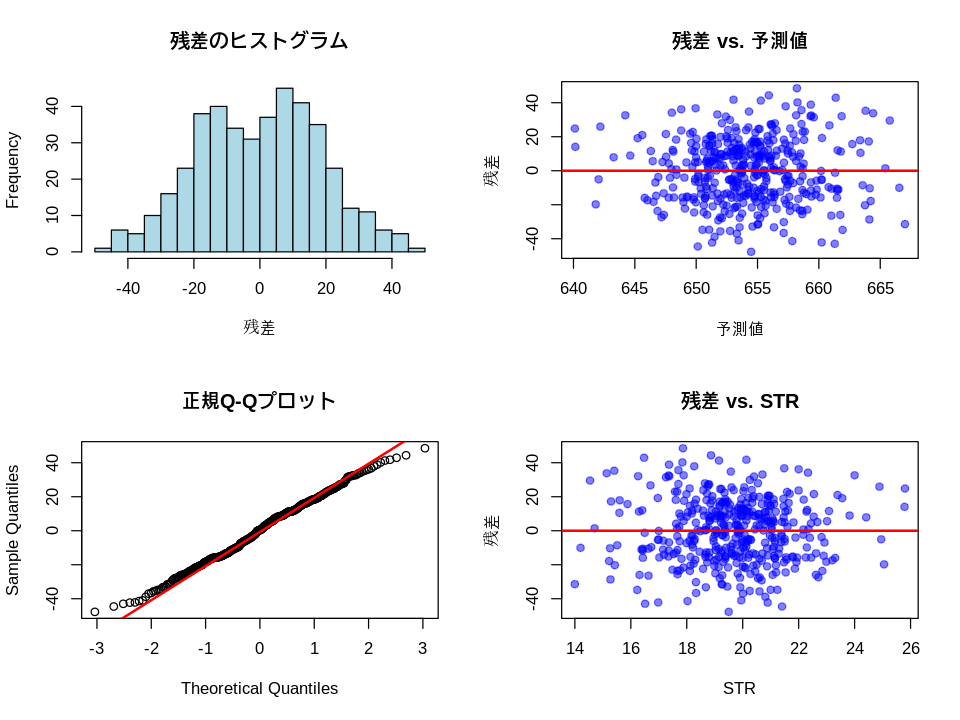

In [17]:
# 模範解答
model <- lm(score ~ STR, data = CASchools)
residuals <- resid(model)
fitted_values <- fitted(model)

par(mfrow = c(2, 2))

# 1. 残差のヒストグラム
hist(residuals, breaks = 30, main = "残差のヒストグラム",
     xlab = "残差", col = "lightblue")

# 2. 残差 vs. 予測値
plot(fitted_values, residuals,
     main = "残差 vs. 予測値",
     xlab = "予測値", ylab = "残差",
     pch = 19, col = rgb(0, 0, 1, 0.5))
abline(h = 0, col = "red", lwd = 2)

# 3. 正規Q-Qプロット
qqnorm(residuals, main = "正規Q-Qプロット")
qqline(residuals, col = "red", lwd = 2)

# 4. 残差 vs. STR
plot(CASchools$STR, residuals,
     main = "残差 vs. STR",
     xlab = "STR", ylab = "残差",
     pch = 19, col = rgb(0, 0, 1, 0.5))
abline(h = 0, col = "red", lwd = 2)

par(mfrow = c(1, 1))

cat("\n=== 残差分析の解釈 ===", "\n")
cat("1. ヒストグラム: 残差はおおむね正規分布に従っているように見える\n")
cat("2. 残差 vs. 予測値: 特定のパターンがないか確認（分散均一性）\n")
cat("3. Q-Qプロット: 直線に近いほど正規性が高い\n")

---
## 問題9: 外れ値の影響

外れ値が回帰係数に与える影響を確認します。

1. 以下のデータで回帰分析を行ってください
```r
X <- c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
Y <- c(2, 4, 5, 4, 5, 6, 7, 8, 9, 30)  # 10番目が外れ値
```
2. 外れ値を除いたデータで回帰分析を行ってください
3. 結果を比較し、外れ値の影響を確認してください

In [18]:
# 問題9の解答欄



### 模範解答

=== 外れ値を含むモデル === 


(Intercept)           X 
  -2.400000    1.890909 



=== 外れ値を除いたモデル === 


(Intercept)     X_clean 
  1.7222222   0.7666667 


Warning message in title(...):
“conversion failure on '外れ値の影響' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '外れ値の影響' in 'mbcsToSbcs': dot substituted for <a4>”


Warning message in title(...):
“conversion failure on '外れ値の影響' in 'mbcsToSbcs': dot substituted for <96>”


Warning message in title(...):
“conversion failure on '外れ値の影響' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '外れ値の影響' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on '外れ値の影響' in 'mbcsToSbcs': dot substituted for <8c>”


Warning message in title(...):
“conversion failure on '外れ値の影響' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '外れ値の影響' in 'mbcsToSbcs': dot substituted for <80>”


Warning message in title(...):
“conversion failure on '外れ値の影響' in 'mbcsToSbcs': dot substituted for <a4>”


Warning message in title(...):
“conversion failure on '外れ値の影響' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '外れ値の影響' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(...):
“conversion failure on '外れ値の影響' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(...):
“conversion failure on '外れ値の影響' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '外れ値の影響' in 'mbcsToSbcs': dot substituted for <bd>”


Warning message in title(...):
“conversion failure on '外れ値の影響' in 'mbcsToSbcs': dot substituted for <b1>”


Warning message in title(...):
“conversion failure on '外れ値の影響' in 'mbcsToSbcs': dot substituted for <e9>”


Warning message in title(...):
“conversion failure on '外れ値の影響' in 'mbcsToSbcs': dot substituted for <9f>”


Warning message in title(...):
“conversion failure on '外れ値の影響' in 'mbcsToSbcs': dot substituted for <bf>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '外れ値を含む' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '外れ値を含む' in 'mbcsToSbcs': dot substituted for <a4>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '外れ値を含む' in 'mbcsToSbcs': dot substituted for <96>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '外れ値を含む' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '外れ値を含む' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '外れ値を含む' in 'mbcsToSbcs': dot substituted for <8c>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '外れ値を含む' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '外れ値を含む' in 'mbcsToSbcs': dot substituted for <80>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '外れ値を含む' in 'mbcsToSbcs': dot substituted for <a4>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '外れ値を含む' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '外れ値を含む' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '外れ値を含む' in 'mbcsToSbcs': dot substituted for <92>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '外れ値を含む' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '外れ値を含む' in 'mbcsToSbcs': dot substituted for <90>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '外れ値を含む' in 'mbcsToSbcs': dot substituted for <ab>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '外れ値を含む' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '外れ値を含む' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '外れ値を含む' in 'mbcsToSbcs': dot substituted for <80>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '外れ値を除く' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '外れ値を除く' in 'mbcsToSbcs': dot substituted for <a4>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '外れ値を除く' in 'mbcsToSbcs': dot substituted for <96>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '外れ値を除く' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '外れ値を除く' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '外れ値を除く' in 'mbcsToSbcs': dot substituted for <8c>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '外れ値を除く' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '外れ値を除く' in 'mbcsToSbcs': dot substituted for <80>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '外れ値を除く' in 'mbcsToSbcs': dot substituted for <a4>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '外れ値を除く' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '外れ値を除く' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '外れ値を除く' in 'mbcsToSbcs': dot substituted for <92>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '外れ値を除く' in 'mbcsToSbcs': dot substituted for <e9>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '外れ値を除く' in 'mbcsToSbcs': dot substituted for <99>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '外れ値を除く' in 'mbcsToSbcs': dot substituted for <a4>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '外れ値を除く' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '外れ値を除く' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '外れ値を除く' in 'mbcsToSbcs': dot substituted for <8f>”


Warning message in text.default(x, y, ...):
“conversion failure on '外れ値を含む' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in text.default(x, y, ...):
“conversion failure on '外れ値を含む' in 'mbcsToSbcs': dot substituted for <a4>”


Warning message in text.default(x, y, ...):
“conversion failure on '外れ値を含む' in 'mbcsToSbcs': dot substituted for <96>”


Warning message in text.default(x, y, ...):
“conversion failure on '外れ値を含む' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in text.default(x, y, ...):
“conversion failure on '外れ値を含む' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in text.default(x, y, ...):
“conversion failure on '外れ値を含む' in 'mbcsToSbcs': dot substituted for <8c>”


Warning message in text.default(x, y, ...):
“conversion failure on '外れ値を含む' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in text.default(x, y, ...):
“conversion failure on '外れ値を含む' in 'mbcsToSbcs': dot substituted for <80>”


Warning message in text.default(x, y, ...):
“conversion failure on '外れ値を含む' in 'mbcsToSbcs': dot substituted for <a4>”


Warning message in text.default(x, y, ...):
“conversion failure on '外れ値を含む' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in text.default(x, y, ...):
“conversion failure on '外れ値を含む' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in text.default(x, y, ...):
“conversion failure on '外れ値を含む' in 'mbcsToSbcs': dot substituted for <92>”


Warning message in text.default(x, y, ...):
“conversion failure on '外れ値を含む' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in text.default(x, y, ...):
“conversion failure on '外れ値を含む' in 'mbcsToSbcs': dot substituted for <90>”


Warning message in text.default(x, y, ...):
“conversion failure on '外れ値を含む' in 'mbcsToSbcs': dot substituted for <ab>”


Warning message in text.default(x, y, ...):
“conversion failure on '外れ値を含む' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in text.default(x, y, ...):
“conversion failure on '外れ値を含む' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in text.default(x, y, ...):
“conversion failure on '外れ値を含む' in 'mbcsToSbcs': dot substituted for <80>”


Warning message in text.default(x, y, ...):
“conversion failure on '外れ値を除く' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in text.default(x, y, ...):
“conversion failure on '外れ値を除く' in 'mbcsToSbcs': dot substituted for <a4>”


Warning message in text.default(x, y, ...):
“conversion failure on '外れ値を除く' in 'mbcsToSbcs': dot substituted for <96>”


Warning message in text.default(x, y, ...):
“conversion failure on '外れ値を除く' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in text.default(x, y, ...):
“conversion failure on '外れ値を除く' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in text.default(x, y, ...):
“conversion failure on '外れ値を除く' in 'mbcsToSbcs': dot substituted for <8c>”


Warning message in text.default(x, y, ...):
“conversion failure on '外れ値を除く' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in text.default(x, y, ...):
“conversion failure on '外れ値を除く' in 'mbcsToSbcs': dot substituted for <80>”


Warning message in text.default(x, y, ...):
“conversion failure on '外れ値を除く' in 'mbcsToSbcs': dot substituted for <a4>”


Warning message in text.default(x, y, ...):
“conversion failure on '外れ値を除く' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in text.default(x, y, ...):
“conversion failure on '外れ値を除く' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in text.default(x, y, ...):
“conversion failure on '外れ値を除く' in 'mbcsToSbcs': dot substituted for <92>”


Warning message in text.default(x, y, ...):
“conversion failure on '外れ値を除く' in 'mbcsToSbcs': dot substituted for <e9>”


Warning message in text.default(x, y, ...):
“conversion failure on '外れ値を除く' in 'mbcsToSbcs': dot substituted for <99>”


Warning message in text.default(x, y, ...):
“conversion failure on '外れ値を除く' in 'mbcsToSbcs': dot substituted for <a4>”


Warning message in text.default(x, y, ...):
“conversion failure on '外れ値を除く' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in text.default(x, y, ...):
“conversion failure on '外れ値を除く' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in text.default(x, y, ...):
“conversion failure on '外れ値を除く' in 'mbcsToSbcs': dot substituted for <8f>”



=== 結論 === 


外れ値は回帰直線の傾きを大きく歪める（レバレッジ効果）


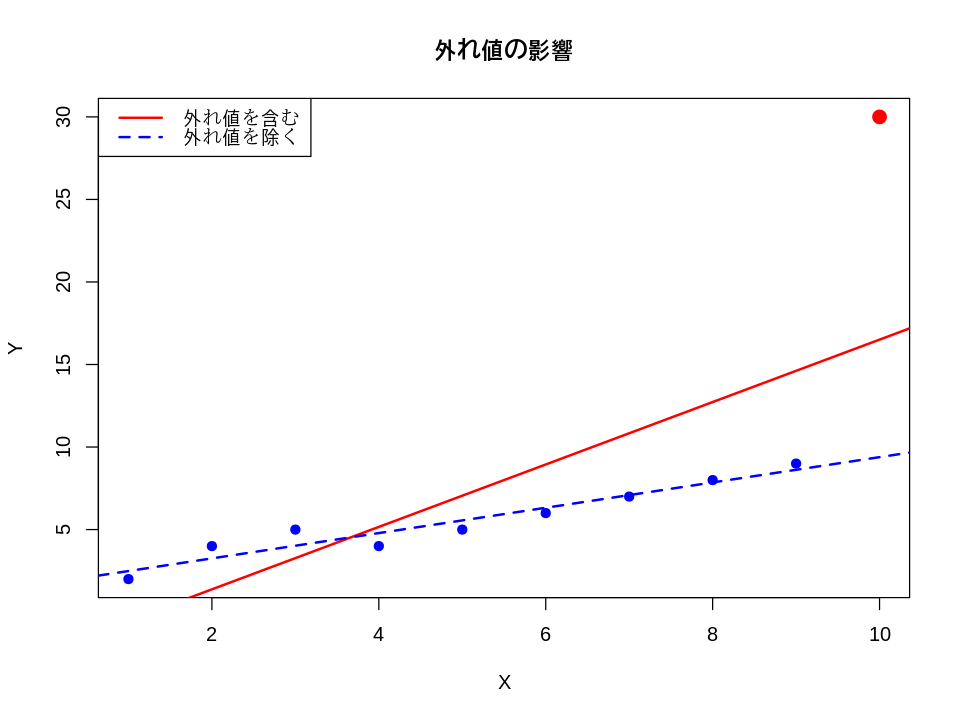

In [19]:
# 模範解答
# データの準備
X <- c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
Y <- c(2, 4, 5, 4, 5, 6, 7, 8, 9, 30)  # 10番目が外れ値

# 1. 外れ値を含むデータでの回帰
model_with_outlier <- lm(Y ~ X)
cat("=== 外れ値を含むモデル ===", "\n")
print(coef(model_with_outlier))

# 2. 外れ値を除いたデータでの回帰
X_clean <- X[-10]
Y_clean <- Y[-10]
model_without_outlier <- lm(Y_clean ~ X_clean)
cat("\n=== 外れ値を除いたモデル ===", "\n")
print(coef(model_without_outlier))

# 3. 視覚的な比較
plot(X, Y, main = "外れ値の影響",
     xlab = "X", ylab = "Y",
     pch = 19, col = "blue")
points(10, 30, col = "red", pch = 19, cex = 1.5)  # 外れ値を強調
abline(model_with_outlier, col = "red", lwd = 2)
abline(model_without_outlier, col = "blue", lwd = 2, lty = 2)
legend("topleft", 
       legend = c("外れ値を含む", "外れ値を除く"),
       col = c("red", "blue"), lty = c(1, 2), lwd = 2)

cat("\n=== 結論 ===", "\n")
cat("外れ値は回帰直線の傾きを大きく歪める（レバレッジ効果）\n")

---
## 問題10: 因果関係と相関関係

以下の疑似相関の例を確認します。

1. 以下のデータを生成してください：
   - Z（気温）: 正規分布 N(20, 5²) から100個
   - X（アイスクリーム売上）: X = 10 + 2*Z + ε₁
   - Y（溺死者数）: Y = 5 + 0.5*Z + ε₂

2. XとYの相関係数を計算し、Yを被説明変数、Xを説明変数とする回帰分析を行ってください

3. この分析結果から「アイスクリーム売上が溺死者数を増やす」と結論できるか、考察してください

In [20]:
# 問題10の解答欄



### 模範解答

XとYの相関係数: 0.6529744 



=== 見せかけの回帰分析 === 



Call:
lm(formula = Y ~ X)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.6007 -1.4191 -0.0687  1.4875  5.7423 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.44722    1.07771   5.982 3.60e-08 ***
X            0.17908    0.02098   8.535 1.81e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.112 on 98 degrees of freedom
Multiple R-squared:  0.4264,	Adjusted R-squared:  0.4205 
F-statistic: 72.84 on 1 and 98 DF,  p-value: 1.809e-13


Warning message in title(...):
“conversion failure on 'アイスクリーム売上 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <a2>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <a4>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <b9>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <af>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <aa>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <bc>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <a0>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <a3>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <b2>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <e4>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <b8>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <8a>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <ba>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <ba>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <ad>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <bb>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <e8>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <80>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <85>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <95>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <b0>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上' in 'mbcsToSbcs': dot substituted for <a2>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上' in 'mbcsToSbcs': dot substituted for <a4>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上' in 'mbcsToSbcs': dot substituted for <b9>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上' in 'mbcsToSbcs': dot substituted for <af>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上' in 'mbcsToSbcs': dot substituted for <aa>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上' in 'mbcsToSbcs': dot substituted for <bc>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上' in 'mbcsToSbcs': dot substituted for <a0>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上' in 'mbcsToSbcs': dot substituted for <a3>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上' in 'mbcsToSbcs': dot substituted for <b2>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上' in 'mbcsToSbcs': dot substituted for <e4>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上' in 'mbcsToSbcs': dot substituted for <b8>”


Warning message in title(...):
“conversion failure on 'アイスクリーム売上' in 'mbcsToSbcs': dot substituted for <8a>”


Warning message in title(...):
“conversion failure on '溺死者数' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '溺死者数' in 'mbcsToSbcs': dot substituted for <ba>”


Warning message in title(...):
“conversion failure on '溺死者数' in 'mbcsToSbcs': dot substituted for <ba>”


Warning message in title(...):
“conversion failure on '溺死者数' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '溺死者数' in 'mbcsToSbcs': dot substituted for <ad>”


Warning message in title(...):
“conversion failure on '溺死者数' in 'mbcsToSbcs': dot substituted for <bb>”


Warning message in title(...):
“conversion failure on '溺死者数' in 'mbcsToSbcs': dot substituted for <e8>”


Warning message in title(...):
“conversion failure on '溺死者数' in 'mbcsToSbcs': dot substituted for <80>”


Warning message in title(...):
“conversion failure on '溺死者数' in 'mbcsToSbcs': dot substituted for <85>”


Warning message in title(...):
“conversion failure on '溺死者数' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '溺死者数' in 'mbcsToSbcs': dot substituted for <95>”


Warning message in title(...):
“conversion failure on '溺死者数' in 'mbcsToSbcs': dot substituted for <b0>”


Warning message in title(...):
“conversion failure on '気温 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '気温 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <b0>”


Warning message in title(...):
“conversion failure on '気温 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <97>”


Warning message in title(...):
“conversion failure on '気温 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '気温 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <b8>”


Warning message in title(...):
“conversion failure on '気温 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <a9>”


Warning message in title(...):
“conversion failure on '気温 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '気温 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <ba>”


Warning message in title(...):
“conversion failure on '気温 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <ba>”


Warning message in title(...):
“conversion failure on '気温 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '気温 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <ad>”


Warning message in title(...):
“conversion failure on '気温 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <bb>”


Warning message in title(...):
“conversion failure on '気温 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <e8>”


Warning message in title(...):
“conversion failure on '気温 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <80>”


Warning message in title(...):
“conversion failure on '気温 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <85>”


Warning message in title(...):
“conversion failure on '気温 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '気温 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <95>”


Warning message in title(...):
“conversion failure on '気温 vs. 溺死者数' in 'mbcsToSbcs': dot substituted for <b0>”


Warning message in title(...):
“conversion failure on '気温' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '気温' in 'mbcsToSbcs': dot substituted for <b0>”


Warning message in title(...):
“conversion failure on '気温' in 'mbcsToSbcs': dot substituted for <97>”


Warning message in title(...):
“conversion failure on '気温' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '気温' in 'mbcsToSbcs': dot substituted for <b8>”


Warning message in title(...):
“conversion failure on '気温' in 'mbcsToSbcs': dot substituted for <a9>”


Warning message in title(...):
“conversion failure on '溺死者数' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '溺死者数' in 'mbcsToSbcs': dot substituted for <ba>”


Warning message in title(...):
“conversion failure on '溺死者数' in 'mbcsToSbcs': dot substituted for <ba>”


Warning message in title(...):
“conversion failure on '溺死者数' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '溺死者数' in 'mbcsToSbcs': dot substituted for <ad>”


Warning message in title(...):
“conversion failure on '溺死者数' in 'mbcsToSbcs': dot substituted for <bb>”


Warning message in title(...):
“conversion failure on '溺死者数' in 'mbcsToSbcs': dot substituted for <e8>”


Warning message in title(...):
“conversion failure on '溺死者数' in 'mbcsToSbcs': dot substituted for <80>”


Warning message in title(...):
“conversion failure on '溺死者数' in 'mbcsToSbcs': dot substituted for <85>”


Warning message in title(...):
“conversion failure on '溺死者数' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '溺死者数' in 'mbcsToSbcs': dot substituted for <95>”


Warning message in title(...):
“conversion failure on '溺死者数' in 'mbcsToSbcs': dot substituted for <b0>”



=== 考察 === 


XとYの間には正の相関があり、回帰係数も有意である。


しかし、これは因果関係ではなく『疑似相関』である。


真の原因は共通の交絡変数Z（気温）であり、


気温が高いとアイスクリーム売上も溺死者数も増える。



→ 相関関係から因果関係を導くことはできない！


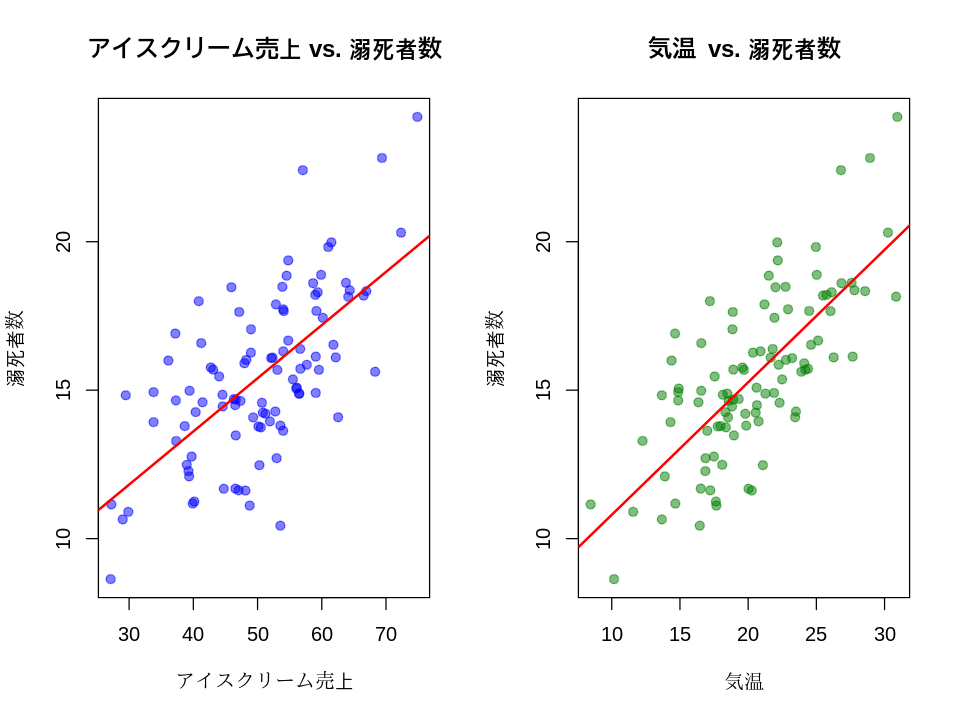

In [21]:
# 模範解答
set.seed(123)
n <- 100

# 1. データ生成
Z <- rnorm(n, mean = 20, sd = 5)  # 気温（交絡変数）
epsilon1 <- rnorm(n, 0, 5)
epsilon2 <- rnorm(n, 0, 2)

X <- 10 + 2 * Z + epsilon1  # アイスクリーム売上
Y <- 5 + 0.5 * Z + epsilon2  # 溺死者数

# 2. 相関係数と回帰分析
cat("XとYの相関係数:", cor(X, Y), "\n\n")

model_spurious <- lm(Y ~ X)
cat("=== 見せかけの回帰分析 ===", "\n")
summary(model_spurious)

# 散布図
par(mfrow = c(1, 2))
plot(X, Y, main = "アイスクリーム売上 vs. 溺死者数",
     xlab = "アイスクリーム売上", ylab = "溺死者数",
     pch = 19, col = rgb(0, 0, 1, 0.5))
abline(model_spurious, col = "red", lwd = 2)

plot(Z, Y, main = "気温 vs. 溺死者数",
     xlab = "気温", ylab = "溺死者数",
     pch = 19, col = rgb(0, 0.5, 0, 0.5))
abline(lm(Y ~ Z), col = "red", lwd = 2)
par(mfrow = c(1, 1))

# 3. 考察
cat("\n=== 考察 ===", "\n")
cat("XとYの間には正の相関があり、回帰係数も有意である。\n")
cat("しかし、これは因果関係ではなく『疑似相関』である。\n")
cat("真の原因は共通の交絡変数Z（気温）であり、\n")
cat("気温が高いとアイスクリーム売上も溺死者数も増える。\n")
cat("\n→ 相関関係から因果関係を導くことはできない！\n")